# **Cat Paw Chart aka Bubble plot — Pyplot and Descartes circles**

COVID Data Science has caught up with every one and I too was trying to visualize in different ways. Sample
here https://twitter.com/sivakd/status/1254638796177432577 . When I wanted to try bubble chart like the one in Tableau
I didn’t find any readily available. Then I tried to draw on and quickly realized that it’s not that simple unless one is familiar with Descartes or Apollonian Gaskets. Not sure I was re-inventing the wheel!!

Using Descartes — Calculate co-ordinates of 3rd circle given radii of 2 tangential circles using 3 radii
From https://lsandig.org/blog/2014/08/apollon-python/en/#descartes-and-his-disciples

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [12]:
import json
import requests

import pandas as pd
from pandas.io.json import json_normalize
import datetime,time

from math import atan2,degrees
import numpy as np

import math
import matplotlib.pyplot as plt

We calculate child3 the x,y co-ordinates of tangential circle about the origin, so need to rotate about the same as child2

In [3]:
#Using Descartes - Calculate co-ordinates of 3rd circle given radii of 2 tangential circles using 3 radii
def calculate_xy(r1,r2,r3):
    x = (r1*r1+r1*r3+r1*r2-r2*r3)/(r1+r2)
    y = math.sqrt((r1+r3)*(r1+r3)-x*x)
    return x,y

In [9]:
#From Stackoverflow
def rotate(point=(0,0), origin=(0, 0), angle=0):
     #Rotate a point counterclockwise by a given angle around a given   origin.
     #The angle should be given in radians.
    
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

We need angle between so that we rotate appropriately

In [10]:
#From Stackoverflow
def angle_between(p1, p2):
    ang1 = np.arctan2(*p1[::-1])
    ang2 = np.arctan2(*p2[::-1])
    return np.rad2deg((ang1 - ang2) % (2 * np.pi))

Main plot
First we draw mother, child1 about the origin and y=0, just makes calculations easier, for child2 we use, Descartes calculate_xy, no rotation as it is the first one.
Child3 and on wards, we use calculate_xy and have to rotate about the angle of adjutant child(2). That’s it. Rest are for visual appeals!!

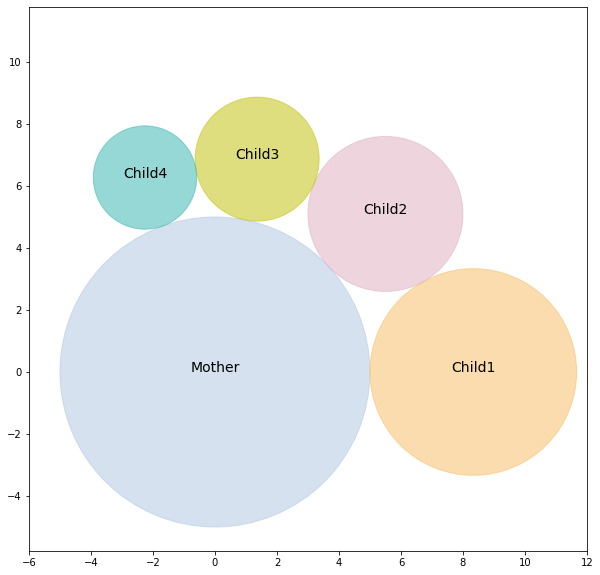

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))

d1=6
d2=4
d0=10 

x=0
y=0
r1=d0/2

ax.add_patch(plt.Circle((x, y), r1, color='#adc5de', clip_on=True,alpha=0.5))
ax.text(x, y, "Mother",   size=14,        ha='center')

r2=d0/3
x=r1+r2
y=0
ax.add_patch(plt.Circle((x, y), r2, color='#f7bb5f', clip_on=True,alpha=0.5))
ax.text(x, y, "Child1",   size=14,        ha='center')

r3=d0/4

x,y=calculate_xy(r1,r2,r3)

ax.add_patch(plt.Circle((x, y), r3, color='#deadbd', clip_on=True,alpha=0.5))
ax.text(x, y, "Child2",   size=14,        ha='center')
#################
#here we calculate the x,y co-ordinates of child3 and also need to claculate the angle of roatation
r4=d0/5
deg = angle_between((x,y),(0,0))

x1,y1=calculate_xy(r1,r3,r4)
x,y = rotate((x1,y1),(0,0),angle=math.radians(deg))

ax.add_patch(plt.Circle((x, y), r4, color='y', clip_on=True,alpha=0.5))
ax.text(x, y, "Child3",   size=14,        ha='center')


r5=d0/6
deg = angle_between((x,y),(0,0))

x1,y1=calculate_xy(r1,r4,r5)
x,y = rotate((x1,y1),(0,0),angle=math.radians(deg))
ax.add_patch(plt.Circle((x, y), r5, color='#2fb3af', clip_on=True,alpha=0.5))
ax.text(x, y, "Child4",   size=14,        ha='center')

#ax.set_xticks([])
#ax.set_yticks([])
ax.set_xlim((-6, 12))
ax.set_ylim((-6, 12))

#Use adjustable='datalim' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   
plt.show()

**Lets put this into work**

In [17]:
url = "https://api.covid19india.org/state_district_wise.json"
data = requests.get(url)
content = data.content

In [25]:
d=json.loads(content)
a_df = pd.DataFrame(columns = ['notes','active','confirmed','deceased','recovered','delta.confirmed',
                               'delta.deceased','delta.recovered','state','district'])
for key in d.keys():
    for k1 in d[key]:
        for k2 in d[key][k1]:
            if k1=='statecode':
                continue
            else:
                df=pd.json_normalize( d[key][k1][k2])
                s=pd.Series({'state':key,'district':k2})
                df=df.merge(s.to_frame().T, left_index=True, right_index=True)
                a_df=a_df.append(df, ignore_index=True)

In [20]:
cff=a_df[a_df['state']=='Tamil Nadu'].sort_values(by=['confirmed'])

In [23]:
top = ["All India",'Maharashtra', 'Delhi', 'Gujarat', 'Rajasthan','Madhya Pradesh',
         'Tamil Nadu', 'Uttar Pradesh','Andhra Pradesh','Telangana','Punjab','Karnataka', "West Bengal"]

In [21]:
def draw_bubblechart(ax,df,title,category_col,count_col,bubbles=5):
    d1=6
    d2=4
    d0=10 

    x=0
    y=0
    r1=d0/2
    
    s1 = 14 #mother bubble
    s2 = 10 #font size on child bubbles
    
    sf=df[count_col].sum()
    cf=df[count_col].head(4)
    df=df[category_col].head(4)

    ax.add_patch(plt.Circle((x, y), r1, color='#adc5de', clip_on=True,alpha=0.5))
    ax.text(x, y+0.6,     title,   size=s1,        ha='center')
    ax.text(x, y,     int(sf),   size=s1,        ha='center')

    r2=d0/3
    x=r1+r2
    y=0
    ax.add_patch(plt.Circle((x, y), r2, color='#f7bb5f', clip_on=True,alpha=0.5))
    ax.text(x, y+0.5, df.iloc[0],   size=s2,        ha='center')
    ax.text(x, y,     int(cf.iloc[0]),   size=s2,        ha='center')

    r3=d0/4
    x= (r1*r1+r1*r3+r1*r2-r2*r3)/(r1+r2)
    y = math.sqrt((r1+r3)*(r1+r3)-x*x)
    x1,y1=calculate_xy(r1,r2,r3)
    ax.add_patch(plt.Circle((x, y), r3, color='#deadbd', clip_on=True,alpha=0.5))
    ax.text(x, y+0.5, df.iloc[1],   size=s2,        ha='center')
    ax.text(x, y,     int(cf.iloc[1]),   size=s2,        ha='center')

    deg = angle_between((x,y),(0,0))
    r4=d0/5
    x1,y1=calculate_xy(r1,r3,r4)
    x,y = rotate((x1,y1),(0,0),angle=math.radians(deg))

    ax.add_patch(plt.Circle((x, y), r4, color='y', clip_on=True,alpha=0.5))
    ax.text(x, y+0.5, df.iloc[2],   size=s2,        ha='center')
    ax.text(x, y,     int(cf.iloc[2]),   size=s2,        ha='center')

    deg = angle_between((x,y),(0,0))
    r5=d0/6
    x1,y1=calculate_xy(r1,r4,r5)
    x,y = rotate((x1,y1),(0,0),angle=math.radians(deg))
    ax.add_patch(plt.Circle((x, y), r5, color='#2fb3af', clip_on=True,alpha=0.5))
    ax.text(x, y+0.5, df.iloc[3],   size=s2,        ha='center')
    ax.text(x, y,     int(cf.iloc[3]),   size=s2,        ha='center')

    for pos in ['top', 'bottom', 'right', 'left']:
        ax.spines[pos].set_edgecolor('#adc5de')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim((-6, 12))
    ax.set_ylim((-6, 12))

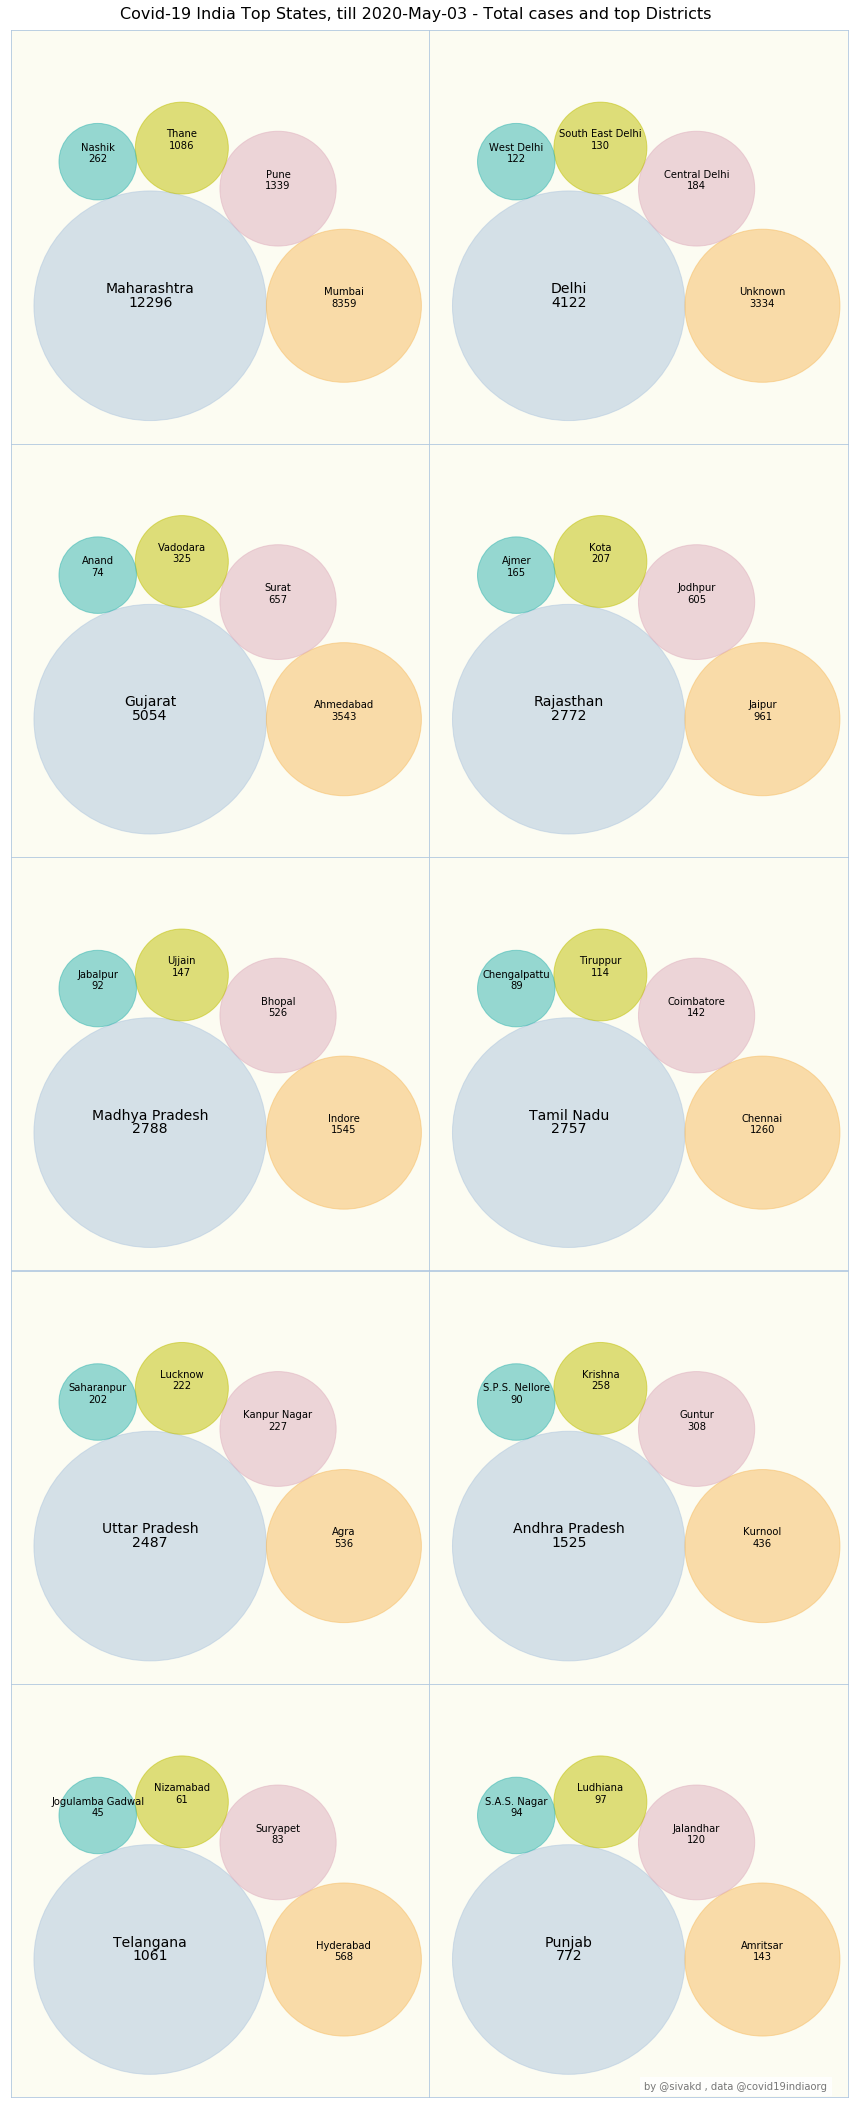

In [26]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,33),  
                                             sharex=False, sharey=False)
i=1 #ignoring all India
for ax in axes.flatten():
    t=top[i]
    #cff = cff[cff['district']!='Unknown'] #incase we want to remove unknown
    cff=a_df[a_df['state']==t].sort_values('confirmed',ascending=False)
    draw_bubblechart(ax,cff,t,'district','confirmed')
    ax.set_facecolor('#fcfcf2') 
    i = i+1
plt.subplots_adjust(left=None, bottom=0.01, right=None, top=None, wspace=0.0002, hspace=0.0002)
fig.suptitle("Covid-19 India Top States, till 2020-May-03 - Total cases and top Districts",size=16,y=0.89)
plt.text(0.95, 0.02, 'by @sivakd , data @covid19indiaorg', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
#plt.savefig("covid-top-states-Des-bubble-may03.png",bbox_inches = "tight")
plt.show()

# **There we go! Howz that?!**!